In [45]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols, glm
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
#import the merged data set
HumanA= pd.read_csv('/Users/tracysanchezpacheco/Documents/Resources/humanA_Behavioural.csv')
HumanA.dropna(axis=0, inplace=True)
HumanAf = HumanA[HumanA['ID'] != 4623]

In [47]:
# Define probability distribution for the response variable for the linear (LM) and logistic (GLM) model
family_LM = sm.families.Gaussian()
family_GLM = sm.families.Binomial()

## Order effects

Text(0.5, 0, 'Residuals')

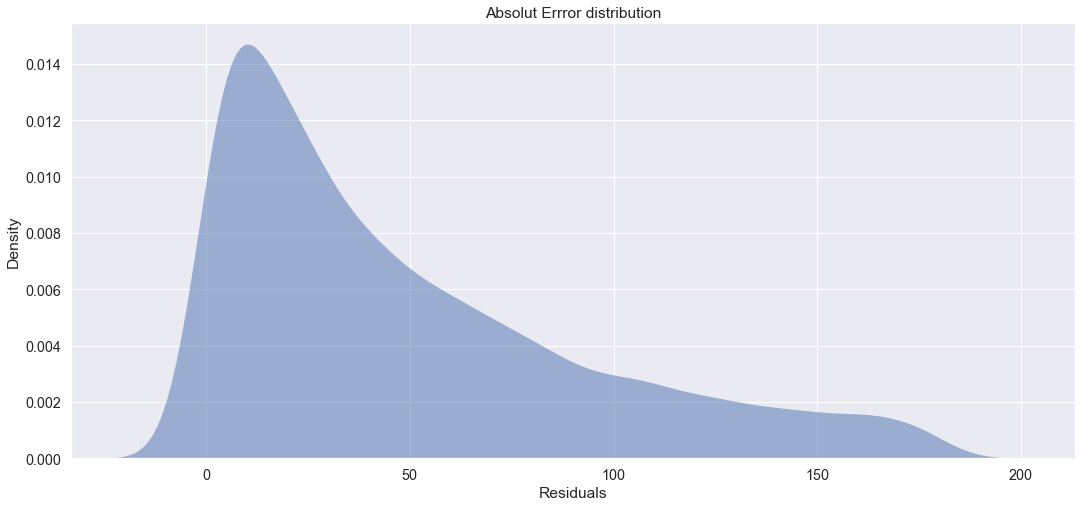

In [48]:
#Plotting KDE for first independent variable
ax = sns.kdeplot(x='AbsolutError', data= HumanAf, shade='fill', palette='Crest', alpha=.5, linewidth=0,)
ax.set_title("Absolut Errror distribution")
ax.set_xlabel("Residuals")

Text(0.5, 0, 'Residuals')

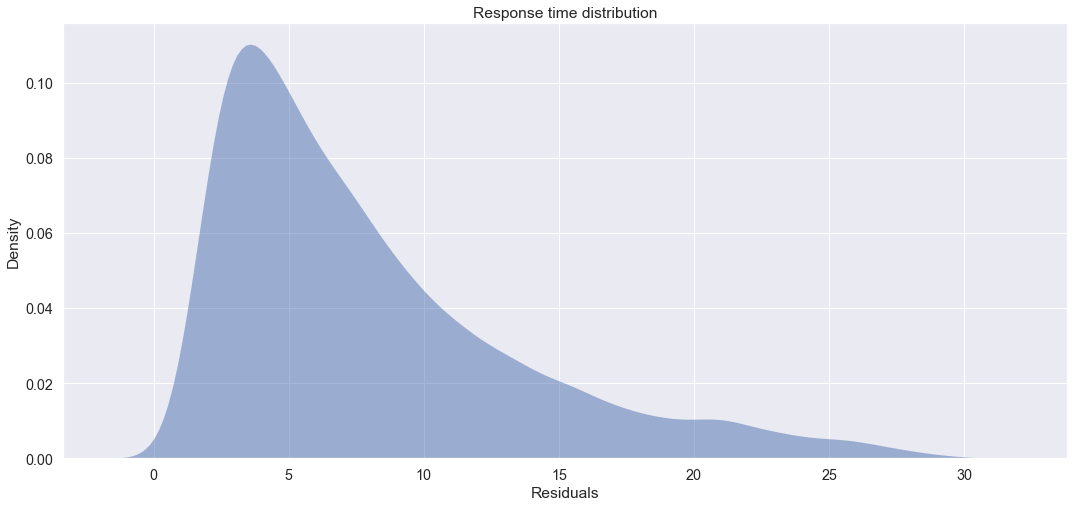

In [49]:
#Plotting KDE for second independent variable
ax = sns.kdeplot(x='RT', data= HumanAf, shade='fill', palette='Crest', alpha=.5, linewidth=0,)
ax.set_title("Response time distribution")
ax.set_xlabel("Residuals")

In [50]:
# Response time predicted by trial order in each starting location
formula = 'np.log(RT) ~ C(ID_for_StartingPosition, Treatment(reference=12))'

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

                                Mixed Linear Model Regression Results
Model:                           MixedLM                Dependent Variable:                np.log(RT)
No. Observations:                8713                   Method:                            REML      
No. Groups:                      26                     Scale:                             0.3320    
Min. group size:                 329                    Log-Likelihood:                    -7643.6524
Max. group size:                 336                    Converged:                         Yes       
Mean group size:                 335.1                                                               
-----------------------------------------------------------------------------------------------------
                                                            Coef. Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------------------------------
Intercept   

Text(0.5, 21.200000000000003, 'Residuals')

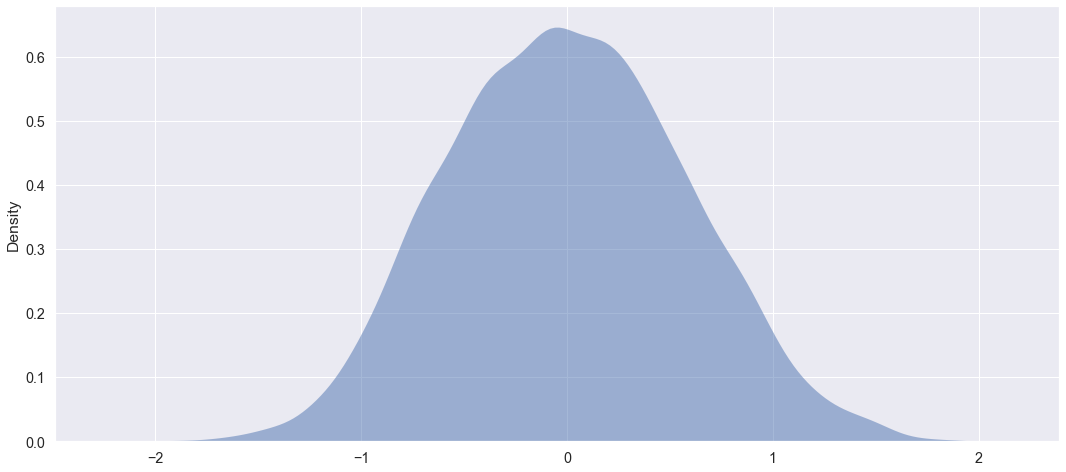

In [51]:
#Plotting residual to check for a normal distribution
sns.kdeplot(model_LM.resid, shade='fill', palette='Crest', alpha=.5, linewidth=0)
ax.set_title("KDE Plot of Model Residuals (Blue) and Normal Distribution (Black)")
ax.set_xlabel("Residuals")

### CONCLUSION
__________________
Subjects are **significantly** slower on the first three trials in each pointing position.

In [52]:
# Response time predicted by trial order in each starting location
formula = 'np.log(AbsolutError) ~ C(ID_for_StartingPosition, Treatment(reference=12))'

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

                                Mixed Linear Model Regression Results
Model:                        MixedLM             Dependent Variable:             np.log(AbsolutError)
No. Observations:             8713                Method:                         REML                
No. Groups:                   26                  Scale:                          1.7278              
Min. group size:              329                 Log-Likelihood:                 -14809.7938         
Max. group size:              336                 Converged:                      Yes                 
Mean group size:              335.1                                                                   
------------------------------------------------------------------------------------------------------
                                                            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------------------------------
Int

### Result
__________________
Subjects do not significantly differ in their precision across time spent at pointing position.


Text(0.5, 21.200000000000003, 'Residuals')

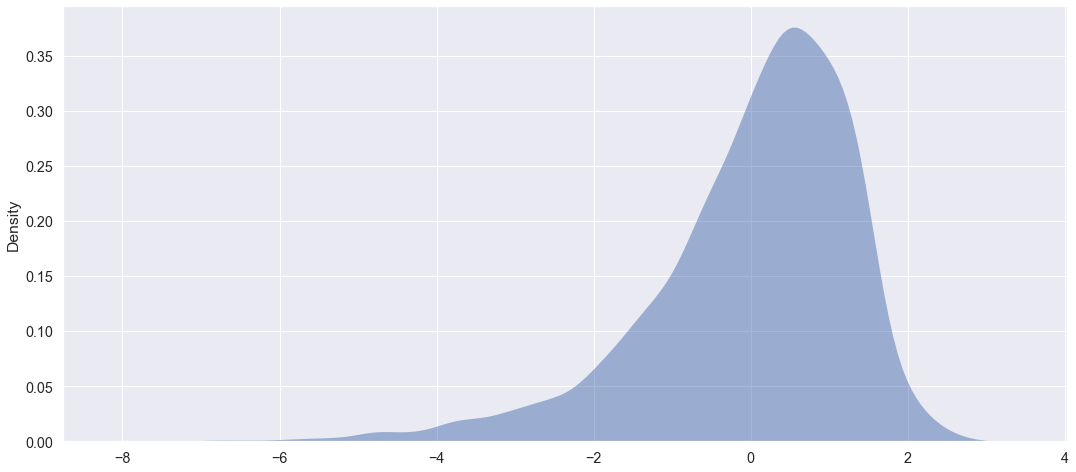

In [53]:
#Plotting residual to check for a normal distribution
sns.kdeplot(model_LM.resid, shade='fill', palette='Crest', alpha=.5, linewidth=0)
ax.set_title("KDE Plot of Model Residuals (Blue) and Normal Distribution (Black)")
ax.set_xlabel("Residuals")

In [54]:
# Response time predicted by trial order at the overall test
formula = 'np.log(RT) ~ C(TrialID, Treatment(reference=336))'

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

                         Mixed Linear Model Regression Results
Model:                        MixedLM           Dependent Variable:           np.log(RT)
No. Observations:             8713              Method:                       REML      
No. Groups:                   26                Scale:                        0.2804    
Min. group size:              329               Log-Likelihood:               -7163.8006
Max. group size:              336               Converged:                    Yes       
Mean group size:              335.1                                                     
----------------------------------------------------------------------------------------
                                              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------------------
Intercept                                      1.394    0.117 11.916 0.000  1.165  1.624
C(TrialID, Treatment(reference=336))[T.1.0]    

### Result
__________________
Subjects are in average 1.5 seconds slower during  the first 10 trials


In [55]:
# Response time predicted by trial order for the overall test
formula = 'np.log(AbsolutError) ~ C(TrialID, Treatment(reference=336))'

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

                         Mixed Linear Model Regression Results
Model:                    MixedLM        Dependent Variable:        np.log(AbsolutError)
No. Observations:         8713           Method:                    REML                
No. Groups:               26             Scale:                     1.7303              
Min. group size:          329            Log-Likelihood:            -14774.9273         
Max. group size:          336            Converged:                 Yes                 
Mean group size:          335.1                                                         
----------------------------------------------------------------------------------------
                                              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------------------
Intercept                                      3.198    0.271 11.786 0.000  2.666  3.730
C(TrialID, Treatment(reference=336))[T.1.0]    

### Result
__________________
Subjects accuracy does not increase throughout the task


### CONCLUSION
__________________
Subjects accuracy does not improve through the task, but their responsable does. This could be evidence of a learning effect of the testing format that does not enhance their performance. Their knwoledge is stable throughout.

## The two factor interaction: Meaningfulness*Presence

In [56]:
# Absolute predicted by Avatar Presence + Avatar Category
formula = "AbsolutError ~ C(Context, Treatment(reference=False)) + C(AvatarPresenceCategory, Treatment(reference='NoAvatar')) + C(Context, Treatment(reference=False)):C(AvatarPresenceCategory, Treatment(reference='NoAvatar'))"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

                                                             Mixed Linear Model Regression Results
Model:                                               MixedLM                                  Dependent Variable:                                  AbsolutError
No. Observations:                                    8713                                     Method:                                              REML        
No. Groups:                                          26                                       Scale:                                               1851.4061   
Min. group size:                                     329                                      Log-Likelihood:                                      -45180.0498 
Max. group size:                                     336                                      Converged:                                           Yes         
Mean group size:                                     335.1                                           

In [57]:
# Absolute predicted by Avatar Presence + Avatar Category
formula = "np.log(AbsolutError) ~  + C(AvatarPresenceCategory, Treatment(reference='NoAvatar')) + C(Context, Treatment(reference=False)):C(AvatarPresenceCategory, Treatment(reference='NoAvatar'))"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

                                                            Mixed Linear Model Regression Results
Model:                                            MixedLM                               Dependent Variable:                               np.log(AbsolutError)
No. Observations:                                 8713                                  Method:                                           REML                
No. Groups:                                       26                                    Scale:                                            1.7238              
Min. group size:                                  329                                   Log-Likelihood:                                   -14789.2102         
Max. group size:                                  336                                   Converged:                                        Yes                 
Mean group size:                                  335.1                                                    

Text(0.5, 21.200000000000003, 'Residuals')

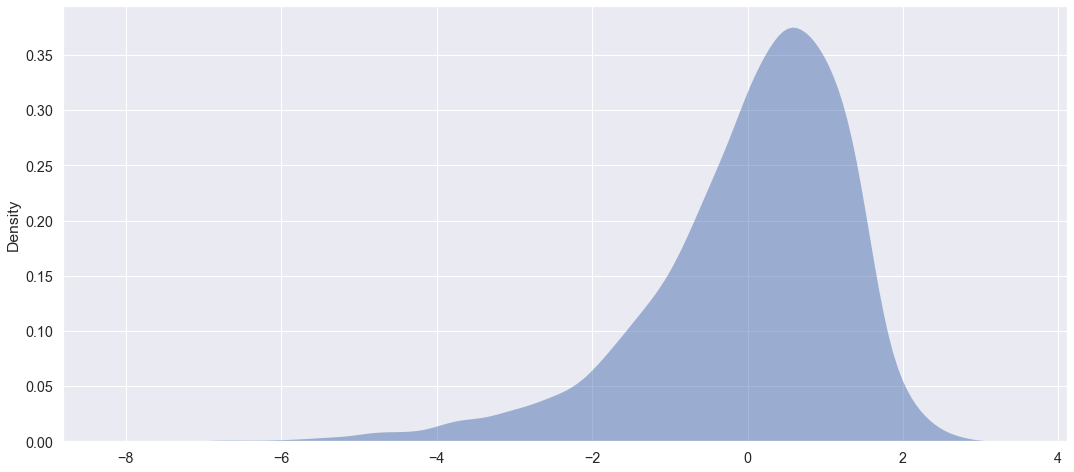

In [58]:
#Plotting residual to check for a normal distribution
sns.kdeplot(model_LM.resid, shade='fill', palette='Crest', alpha=.5, linewidth=0)
ax.set_title("KDE Plot of Model Residuals (Blue) and Normal Distribution (Black)")
ax.set_xlabel("Residuals")

In [59]:
# Response time predicted by Avatar Presence
formula = "np.log(RT) ~ C(Context, Treatment(reference=False)) + C(AvatarPresenceCategory, Treatment(reference='NoAvatar')) + C(Context, Treatment(reference=False))*C(AvatarPresenceCategory, Treatment(reference='NoAvatar'))"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

/Users/tracysanchezpacheco/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tracysanchezpacheco/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


                                                            Mixed Linear Model Regression Results
Model:                                              MixedLM                                   Dependent Variable:                                   np.log(RT)
No. Observations:                                   8713                                      Method:                                               REML      
No. Groups:                                         26                                        Scale:                                                0.4054    
Min. group size:                                    329                                       Log-Likelihood:                                       -8493.9495
Max. group size:                                    336                                       Converged:                                            Yes       
Mean group size:                                    335.1                                                  

In [91]:
import random
number = random.randint(1000,9999)
print(number)

6268


In [60]:
# Response time predicted Avatar Category + Location
formula = "AbsolutError ~ avatarID + C(Context, Treatment(reference=False)) + avatarID:C(Context, Treatment(reference=False))"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

                               Mixed Linear Model Regression Results
Model:                          MixedLM               Dependent Variable:               AbsolutError
No. Observations:               8713                  Method:                           REML        
No. Groups:                     26                    Scale:                            1847.9669   
Min. group size:                329                   Log-Likelihood:                   -45177.5685 
Max. group size:                336                   Converged:                        Yes         
Mean group size:                335.1                                                               
----------------------------------------------------------------------------------------------------
                                                         Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
----------------------------------------------------------------------------------------------------
Intercept             

In [61]:
# Absolut error predicted by location
formula = "np.log(AbsolutError) ~ C(avatarID)"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

              Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: np.log(AbsolutError)
No. Observations: 8713    Method:             REML                
No. Groups:       26      Scale:              1.6372              
Min. group size:  329     Log-Likelihood:     -14604.2410         
Max. group size:  336     Converged:          Yes                 
Mean group size:  335.1                                           
------------------------------------------------------------------
                        Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------
Intercept                3.025    0.130 23.196 0.000  2.770  3.281
C(avatarID)[T.2.0]       0.410    0.146  2.809 0.005  0.124  0.696
C(avatarID)[T.3.0]       0.108    0.144  0.747 0.455 -0.175  0.390
C(avatarID)[T.4.0]       0.112    0.143  0.789 0.430 -0.167  0.392
C(avatarID)[T.5.0]      -0.092    0.145 -0.637 0.524 -0.376  0.192
C(avatarID

## FRS questionnaire analysis

In [62]:
# Absolut error predicted by FRS
formula = "np.log(RT) ~ Global + Overview + Cardinal"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: np.log(RT)
No. Observations: 8713    Method:             REML      
No. Groups:       26      Scale:              0.4058    
Min. group size:  329     Log-Likelihood:     -8494.5928
Max. group size:  336     Converged:          Yes       
Mean group size:  335.1                                 
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      1.985    0.260  7.638 0.000  1.475  2.494
Global         0.037    0.061  0.607 0.544 -0.082  0.156
Overview      -0.075    0.043 -1.761 0.078 -0.158  0.008
Cardinal      -0.004    0.053 -0.075 0.940 -0.108  0.100
Group Var      0.074    0.036                           



In [63]:
X = HumanAf[['Global', 'Overview', 'Cardinal']]
y = HumanAf['AbsolutError']

## fit a OLS model with intercept on FRS subscales
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AbsolutError   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     65.29
Date:                Tue, 21 Jun 2022   Prob (F-statistic):           9.63e-42
Time:                        17:42:52   Log-Likelihood:                -45477.
No. Observations:                8713   AIC:                         9.096e+04
Df Residuals:                    8709   BIC:                         9.099e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.6635      2.315     29.224      0.000      63.125      72.202
Global        -3.0776      0.541     -5.693      0.000      -4.137      -2.018
Overview       1.1239      0.379      2.966      0.003       0.381       1.867
Cardinal      -3.8963      0.474     -8.220      0.000      -4.825      -2.967
==============================================================================
Omnibus:                     1157.055   Durbin-Watson:                   1.557
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1673.656
Skew:                           1.062   Prob(JB):                         0.00
Kurtosis:                       3.316   Cond. No.                         32.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0, 'Residuals')

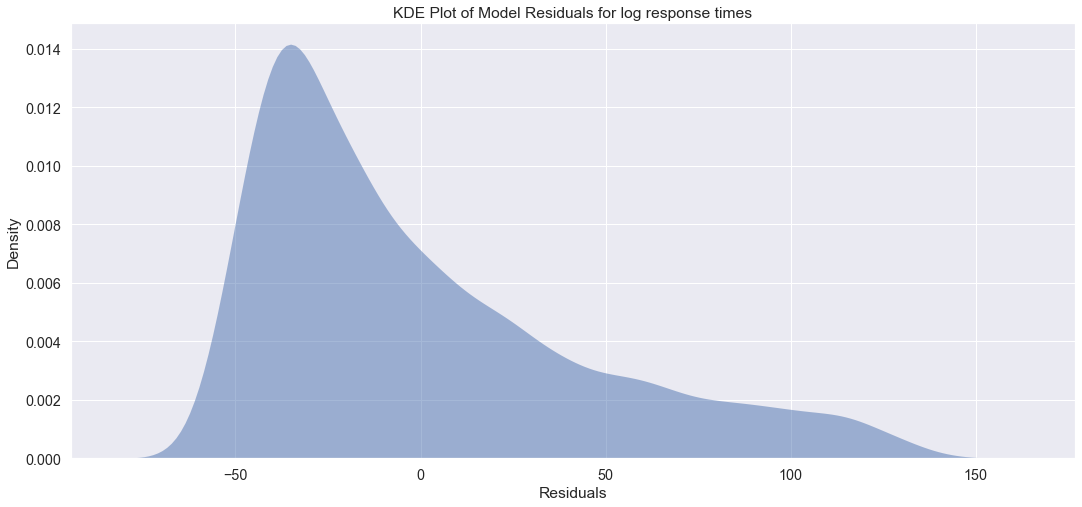

In [64]:
#Plotting residual to check for a normal distribution
ax = sns.kdeplot(est.resid, shade='fill', palette='Crest', alpha=.5, linewidth=0)
ax.set_title("KDE Plot of Model Residuals for log response times")
ax.set_xlabel("Residuals")

In [89]:
# Absolut error predicted by FRS
formula = "AbsolutError ~ Global + Overview + Cardinal"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: AbsolutError
No. Observations: 8713    Method:             REML        
No. Groups:       26      Scale:              1852.9275   
Min. group size:  329     Log-Likelihood:     -45179.8682 
Max. group size:  336     Converged:          Yes         
Mean group size:  335.1                                   
-----------------------------------------------------------
            Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
-----------------------------------------------------------
Intercept   67.688    12.722   5.320  0.000  42.752  92.623
Global      -3.082     2.968  -1.038  0.299  -8.900   2.736
Overview     1.123     2.082   0.539  0.590  -2.958   5.204
Cardinal    -3.894     2.606  -1.494  0.135  -9.002   1.214
Group Var  174.728     1.265                               



Text(0.5, 0, 'Residuals')

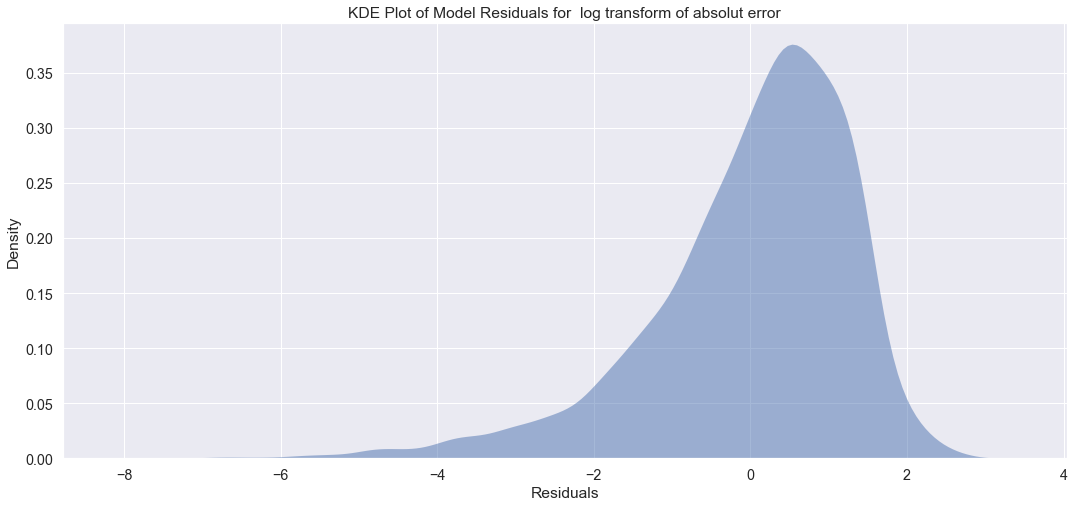

In [66]:
#Plotting residual to check for a normal distribution
ax = sns.kdeplot(model_LM.resid, shade='fill', palette='Crest', alpha=.5, linewidth=0)
ax.set_title("KDE Plot of Model Residuals for  log transform of absolut error")
ax.set_xlabel("Residuals")

In [67]:
# Response Time predicted by FRS
formula = "np.log(RT) ~ Global + Overview + Cardinal"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: np.log(RT)
No. Observations: 8713    Method:             REML      
No. Groups:       26      Scale:              0.4058    
Min. group size:  329     Log-Likelihood:     -8494.5928
Max. group size:  336     Converged:          Yes       
Mean group size:  335.1                                 
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      1.985    0.260  7.638 0.000  1.475  2.494
Global         0.037    0.061  0.607 0.544 -0.082  0.156
Overview      -0.075    0.043 -1.761 0.078 -0.158  0.008
Cardinal      -0.004    0.053 -0.075 0.940 -0.108  0.100
Group Var      0.074    0.036                           



## Avatar questionnaire analysis

In [68]:
# Response time predicted by Avatar Presence
formula = "AbsolutError ~ remember_action_likert + remember_standing_likert  + attractive_action_likert + attractive_standing_likert + realistic_action_likert + realistic_standing_likert"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

                 Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     AbsolutError
No. Observations:      8713        Method:                 REML        
No. Groups:            26          Scale:                  1852.9295   
Min. group size:       329         Log-Likelihood:         -45162.5673 
Max. group size:       336         Converged:              Yes         
Mean group size:       335.1                                           
-----------------------------------------------------------------------
                            Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-----------------------------------------------------------------------
Intercept                   59.972   19.729  3.040 0.002  21.303 98.641
remember_action_likert     -17.341    4.921 -3.524 0.000 -26.985 -7.696
remember_standing_likert    18.924    7.077  2.674 0.007   5.054 32.794
attractive_action_likert    23.339    9.350  2.496 0.013   5.013 41.664
attractiv

In [69]:
# Isolating the avatar Quest variables for correlation
HumanAavatarQ = HumanAf[['remember_action_likert', 'remember_standing_likert', 'attractive_action_likert', 'attractive_standing_likert', 'realistic_action_likert', 'realistic_standing_likert' ]]

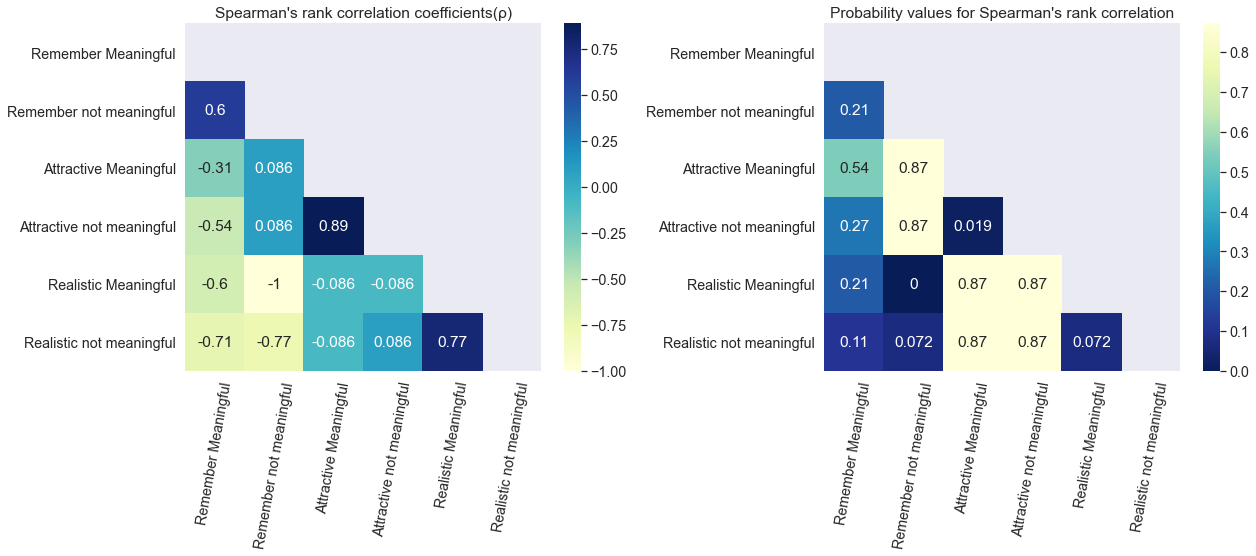

In [70]:
sns.set(rc={"figure.figsize":(18, 8)})
sns.set(font_scale = 1.3)
from matplotlib import cm
initial_cmap = cm.get_cmap('YlGnBu')
reversed_cmap=initial_cmap.reversed()

fig, ax = plt.subplots(nrows=1,ncols=2)

#Calculates pearsons r matrix
corrMatrix = HumanAavatarQ.corr()
#Creates a mask that eliminates the 1s
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
#Calculates spearmans s
cor, pval = stats.spearmanr(corrMatrix.T)
#Heatmap plotting
sns.heatmap(cor, annot=True, cmap="YlGnBu", mask=mask, ax=ax[0]).set(title="Spearman's rank correlation coefficients(ρ)")
sns.heatmap(pval, annot=True, cmap=reversed_cmap, mask=mask, ax=ax[1]).set(title="Probability values for Spearman's rank correlation")
#sns.heatmap(corrMatrix, annot=True, cmap="YlGnBu", mask=mask,ax=[2])

for ax in ax.ravel():
    ax.set_xticklabels(['Remember Meaningful', 'Remember not meaningful', 'Attractive Meaningful', 'Attractive not meaningful', 'Realistic Meaningful', 'Realistic not meaningful'], rotation=80);
    ax.set_yticklabels(['Remember Meaningful', 'Remember not meaningful', 'Attractive Meaningful', 'Attractive not meaningful', 'Realistic Meaningful', 'Realistic not meaningful'], rotation=360);
plt.tight_layout()
plt.show()

In [71]:
stats.spearmanr(HumanAavatarQ.remember_standing_likert, HumanAavatarQ.remember_action_likert)


SpearmanrResult(correlation=0.6224918581777719, pvalue=0.0)

In [72]:
HumanAavatarQ.head()

,remember_action_likert,remember_standing_likert,attractive_action_likert,attractive_standing_likert,realistic_action_likert,realistic_standing_likert
1,2.25,1.714286,2.607143,2.607143,2.964286,2.678571
2,2.25,1.714286,2.607143,2.607143,2.964286,2.678571
3,2.25,1.714286,2.607143,2.607143,2.964286,2.678571
4,2.25,1.714286,2.607143,2.607143,2.964286,2.678571
5,2.25,1.714286,2.607143,2.607143,2.964286,2.678571


## Calculating a factorial analysis on the questionnaire

In [73]:
AvatarQuest= pd.read_csv('/Users/tracysanchezpacheco/Documents/Resources/AvatarQuestcsv.csv')
AvatarQuest.drop('Unnamed: 0', axis=1, inplace=True)
AvatarQuest.head()

,ID,Atractive 1,Atractive 2,Atractive 3,Atractive 4,Atractive 5,Atractive 6,Atractive 7,Atractive 8,Atractive 9,...,Remember 47,Remember 48,Remember 49,Remember 50,Remember 51,Remember 52,Remember 53,Remember 54,Remember 55,Remember 56
0,365,1,3,2,2,3,4,2,2,5,...,1,1,1,1,1,1,1,1,1,1
1,479,1,1,1,1,1,1,1,1,1,...,1,3,1,5,3,2,2,1,3,3
2,1754,3,4,4,3,5,4,3,3,4,...,1,2,1,1,1,1,1,1,1,1
3,2258,2,2,2,2,2,3,2,2,2,...,2,2,2,1,1,2,1,1,2,3
4,3246,2,4,2,2,3,2,2,2,2,...,3,1,1,1,2,3,1,2,1,2


In [74]:
b = list(range(1,57))
Attractive= AvatarQuest.iloc[: , b].copy()
Attractive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 56 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Atractive 1   25 non-null     int64
 1   Atractive 2   25 non-null     int64
 2   Atractive 3   25 non-null     int64
 3   Atractive 4   25 non-null     int64
 4   Atractive 5   25 non-null     int64
 5   Atractive 6   25 non-null     int64
 6   Atractive 7   25 non-null     int64
 7   Atractive 8   25 non-null     int64
 8   Atractive 9   25 non-null     int64
 9   Atractive 10  25 non-null     int64
 10  Atractive 11  25 non-null     int64
 11  Atractive 12  25 non-null     int64
 12  Atractive 13  25 non-null     int64
 13  Atractive 14  25 non-null     int64
 14  Atractive 15  25 non-null     int64
 15  Atractive 16  25 non-null     int64
 16  Atractive 17  25 non-null     int64
 17  Atractive 18  25 non-null     int64
 18  Atractive 19  25 non-null     int64
 19  Atractive 20  25 non-null     i

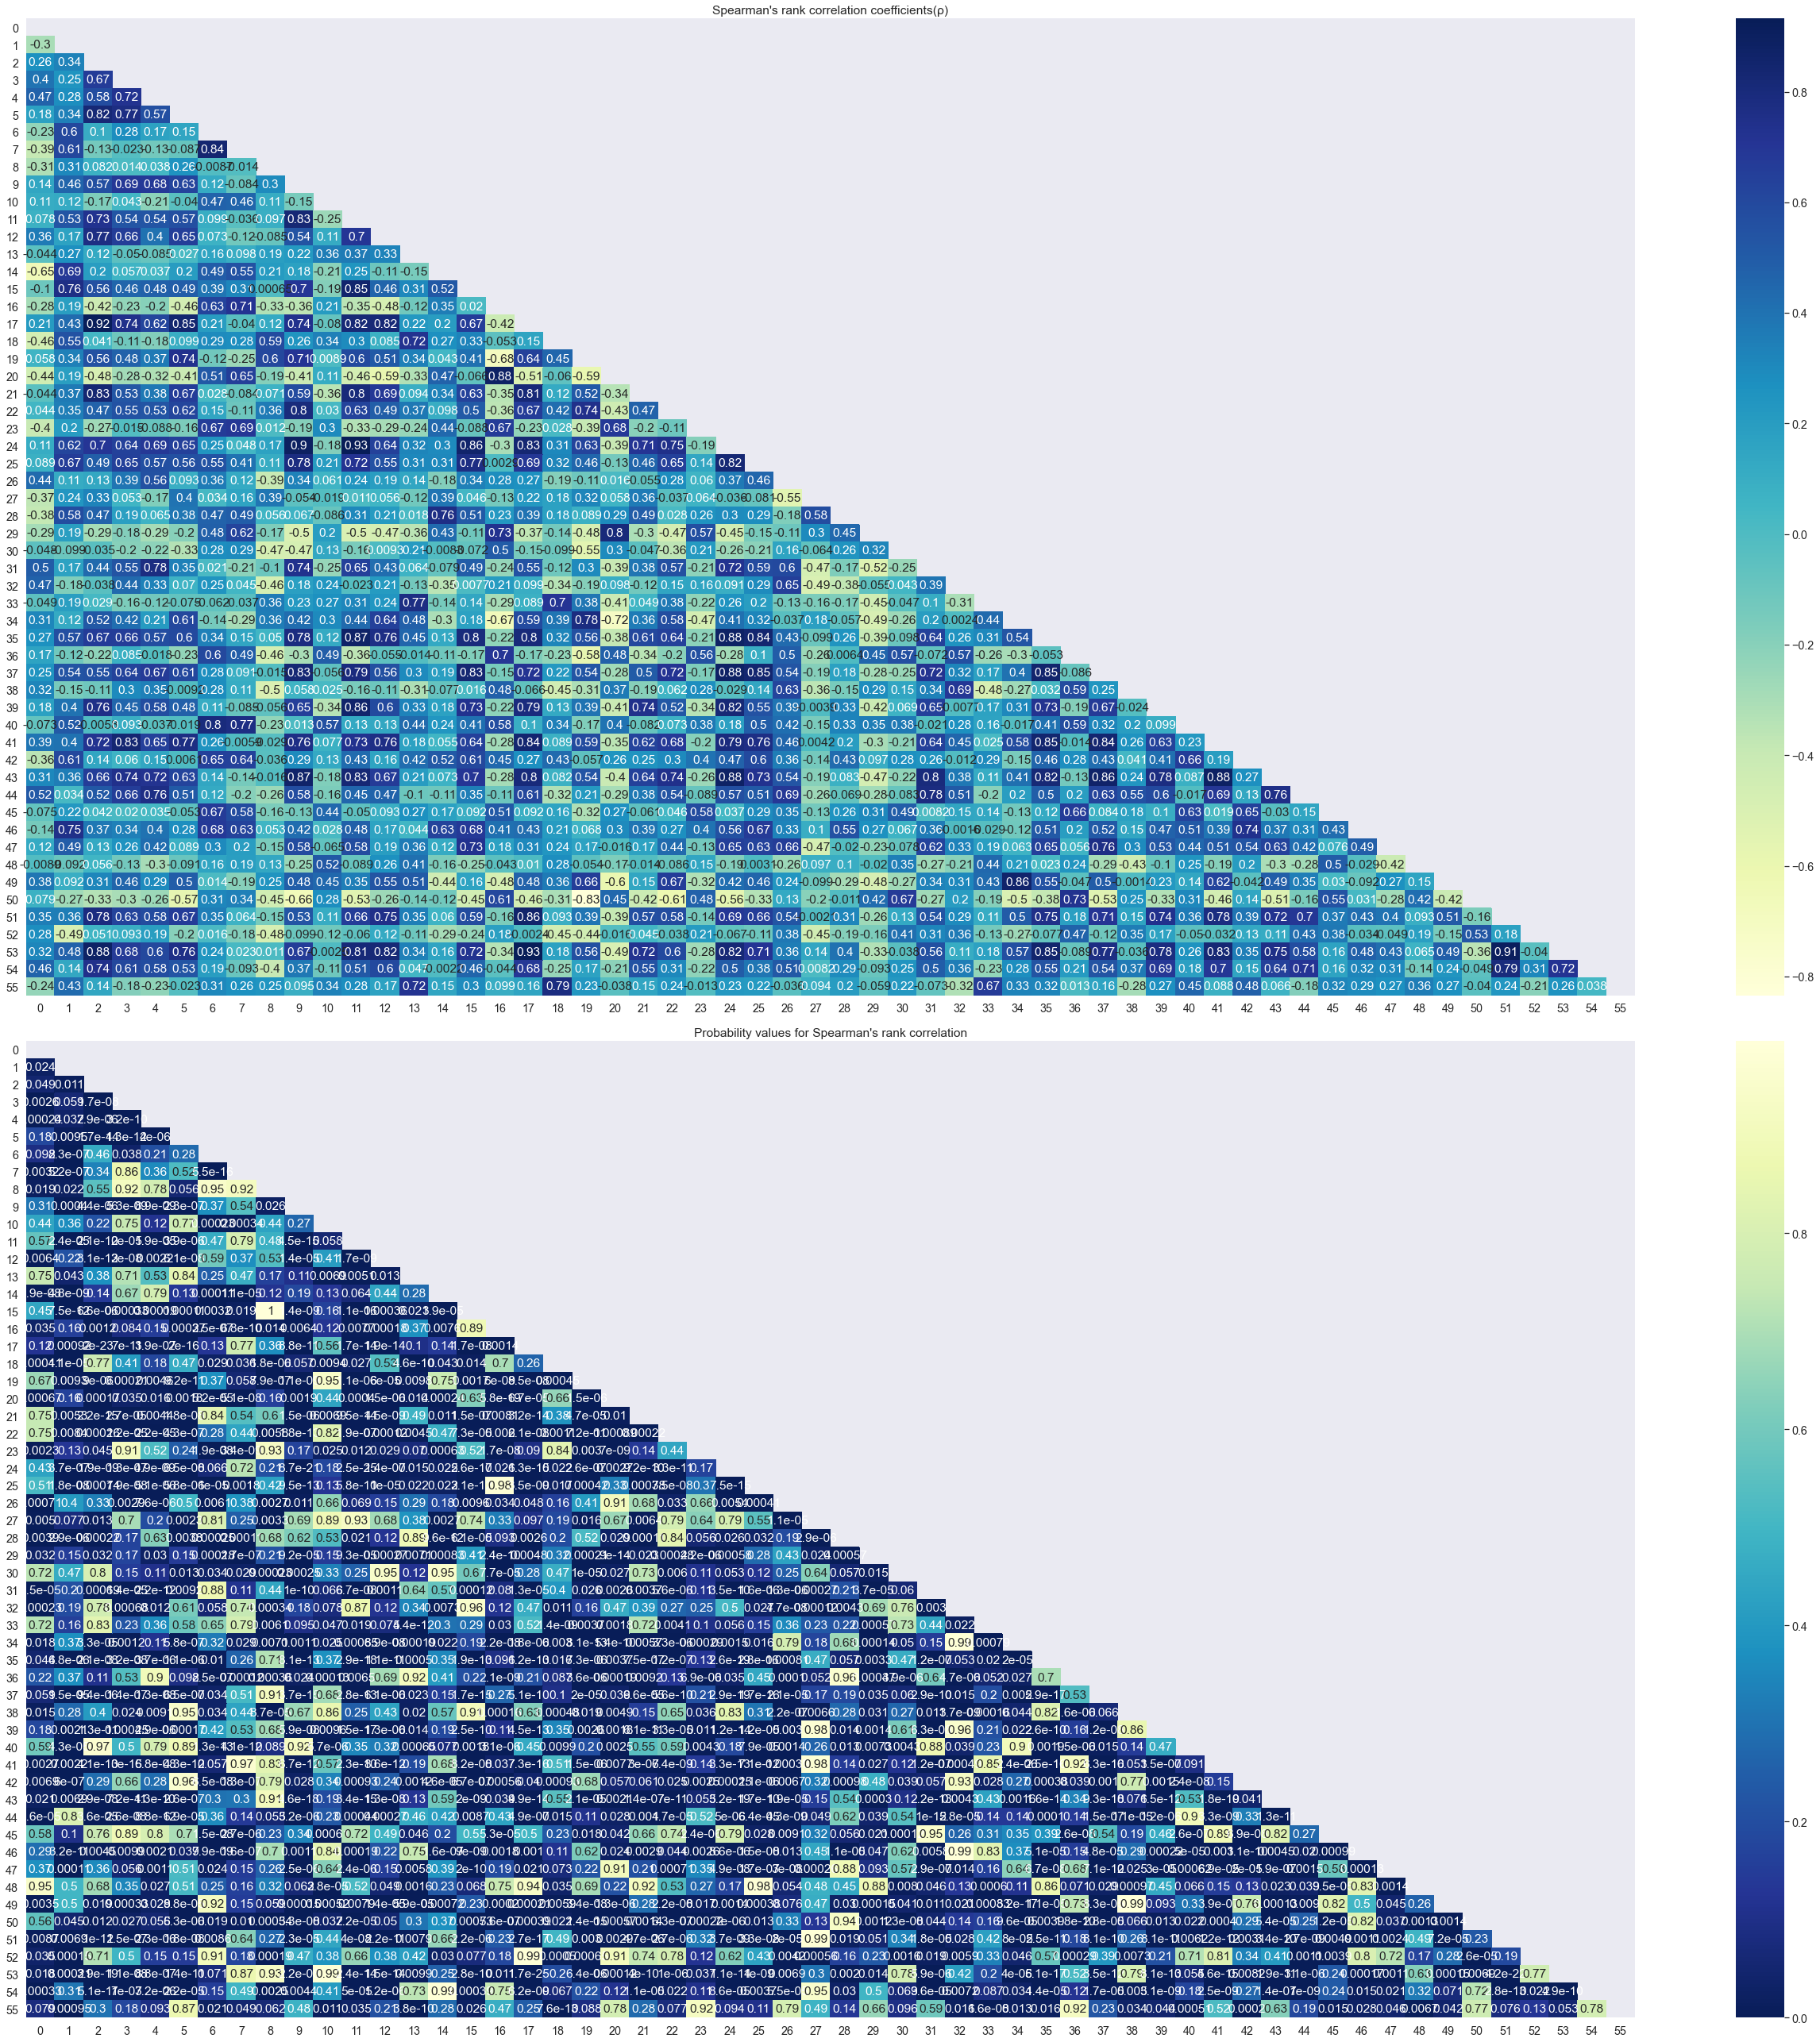

In [75]:
sns.set(rc={"figure.figsize":(36, 36)})
sns.set(font_scale = 1.3)
from matplotlib import cm
initial_cmap = cm.get_cmap('YlGnBu')
reversed_cmap=initial_cmap.reversed()

fig, ax = plt.subplots(nrows=2,ncols=1)

#Calculates pearsons r matrix
corrMatrix = Attractive.corr()
#Creates a mask that eliminates the 1s
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
#Calculates spearmans s
cor, pval = stats.spearmanr(corrMatrix.T)
#Heatmap plotting
sns.heatmap(cor, annot=True, cmap="YlGnBu", mask=mask, ax=ax[0]).set(title="Spearman's rank correlation coefficients(ρ)")
sns.heatmap(pval, annot=True, cmap=reversed_cmap, mask=mask, ax=ax[1]).set(title="Probability values for Spearman's rank correlation")
#sns.heatmap(corrMatrix, annot=True, cmap="YlGnBu", mask=mask,ax=[2])
plt.tight_layout()
plt.show()

In [76]:
corrMatrix.T

,Atractive 1,Atractive 2,Atractive 3,Atractive 4,Atractive 5,Atractive 6,Atractive 7,Atractive 8,Atractive 9,Atractive 10,...,Atractive 47,Atractive 48,Atractive 49,Atractive 50,Atractive 51,Atractive 52,Atractive 53,Atractive 54,Atractive 55,Atractive 56
Atractive 1,1.000000,0.055188,0.285119,0.257782,0.467884,0.151250,0.076519,-0.002050,0.034373,0.149040,...,0.265085,0.228710,0.221098,0.316401,0.419765,0.308313,0.182625,0.412968,0.361497,0.093525
Atractive 2,0.055188,1.000000,0.407046,0.311400,0.374149,0.421125,0.647048,0.638880,0.325261,0.438357,...,0.688963,0.439794,0.130437,0.178622,0.083192,0.406300,-0.205396,0.493558,0.305083,0.471558
Atractive 3,0.285119,0.407046,1.000000,0.548454,0.493528,0.715807,0.424492,0.230280,0.201520,0.389706,...,0.528673,0.047667,0.323815,0.313922,0.290254,0.741286,0.225092,0.792636,0.775440,0.359898
Atractive 4,0.257782,0.311400,0.548454,1.000000,0.678607,0.640078,0.563693,0.381701,0.266685,0.676427,...,0.441928,0.227156,0.282876,0.396985,0.249807,0.483580,0.239851,0.492688,0.481999,0.137665
Atractive 5,0.467884,0.374149,0.493528,0.678607,1.000000,0.501265,0.500373,0.218220,0.390045,0.538394,...,0.516786,0.345390,0.104578,0.272462,0.300855,0.487025,0.316115,0.524715,0.411442,0.117896
Atractive 6,0.151250,0.421125,0.715807,0.640078,0.501265,1.000000,0.475772,0.256236,0.283111,0.521158,...,0.431998,0.117027,0.201785,0.516501,-0.038132,0.672189,0.054919,0.700813,0.518230,0.203904
Atractive 7,0.076519,0.647048,0.424492,0.563693,0.500373,0.475772,1.000000,0.782824,0.307054,0.487201,...,0.648806,0.349195,0.324391,0.385256,0.454069,0.587422,0.137120,0.561693,0.464478,0.438157
Atractive 8,-0.002050,0.638880,0.230280,0.381701,0.218220,0.256236,0.782824,1.000000,0.274534,0.390778,...,0.711501,0.344937,0.375833,0.229862,0.431731,0.440561,-0.017802,0.439988,0.281968,0.436796
Atractive 9,0.034373,0.325261,0.201520,0.266685,0.390045,0.283111,0.307054,0.274534,1.000000,0.394914,...,0.257872,-0.033362,0.177958,0.302656,0.101163,-0.006489,-0.056857,0.142135,0.022355,0.324300
Atractive 10,0.149040,0.438357,0.389706,0.676427,0.538394,0.521158,0.487201,0.390778,0.394914,1.000000,...,0.567412,0.492560,0.188163,0.472236,-0.061400,0.445872,0.155421,0.538394,0.307647,0.339135


<ipython-input-77-5d2b43fc8427>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HumanAavatarQ.dropna(inplace=True);


33961.70911314356 0.0
0.3871364891392994


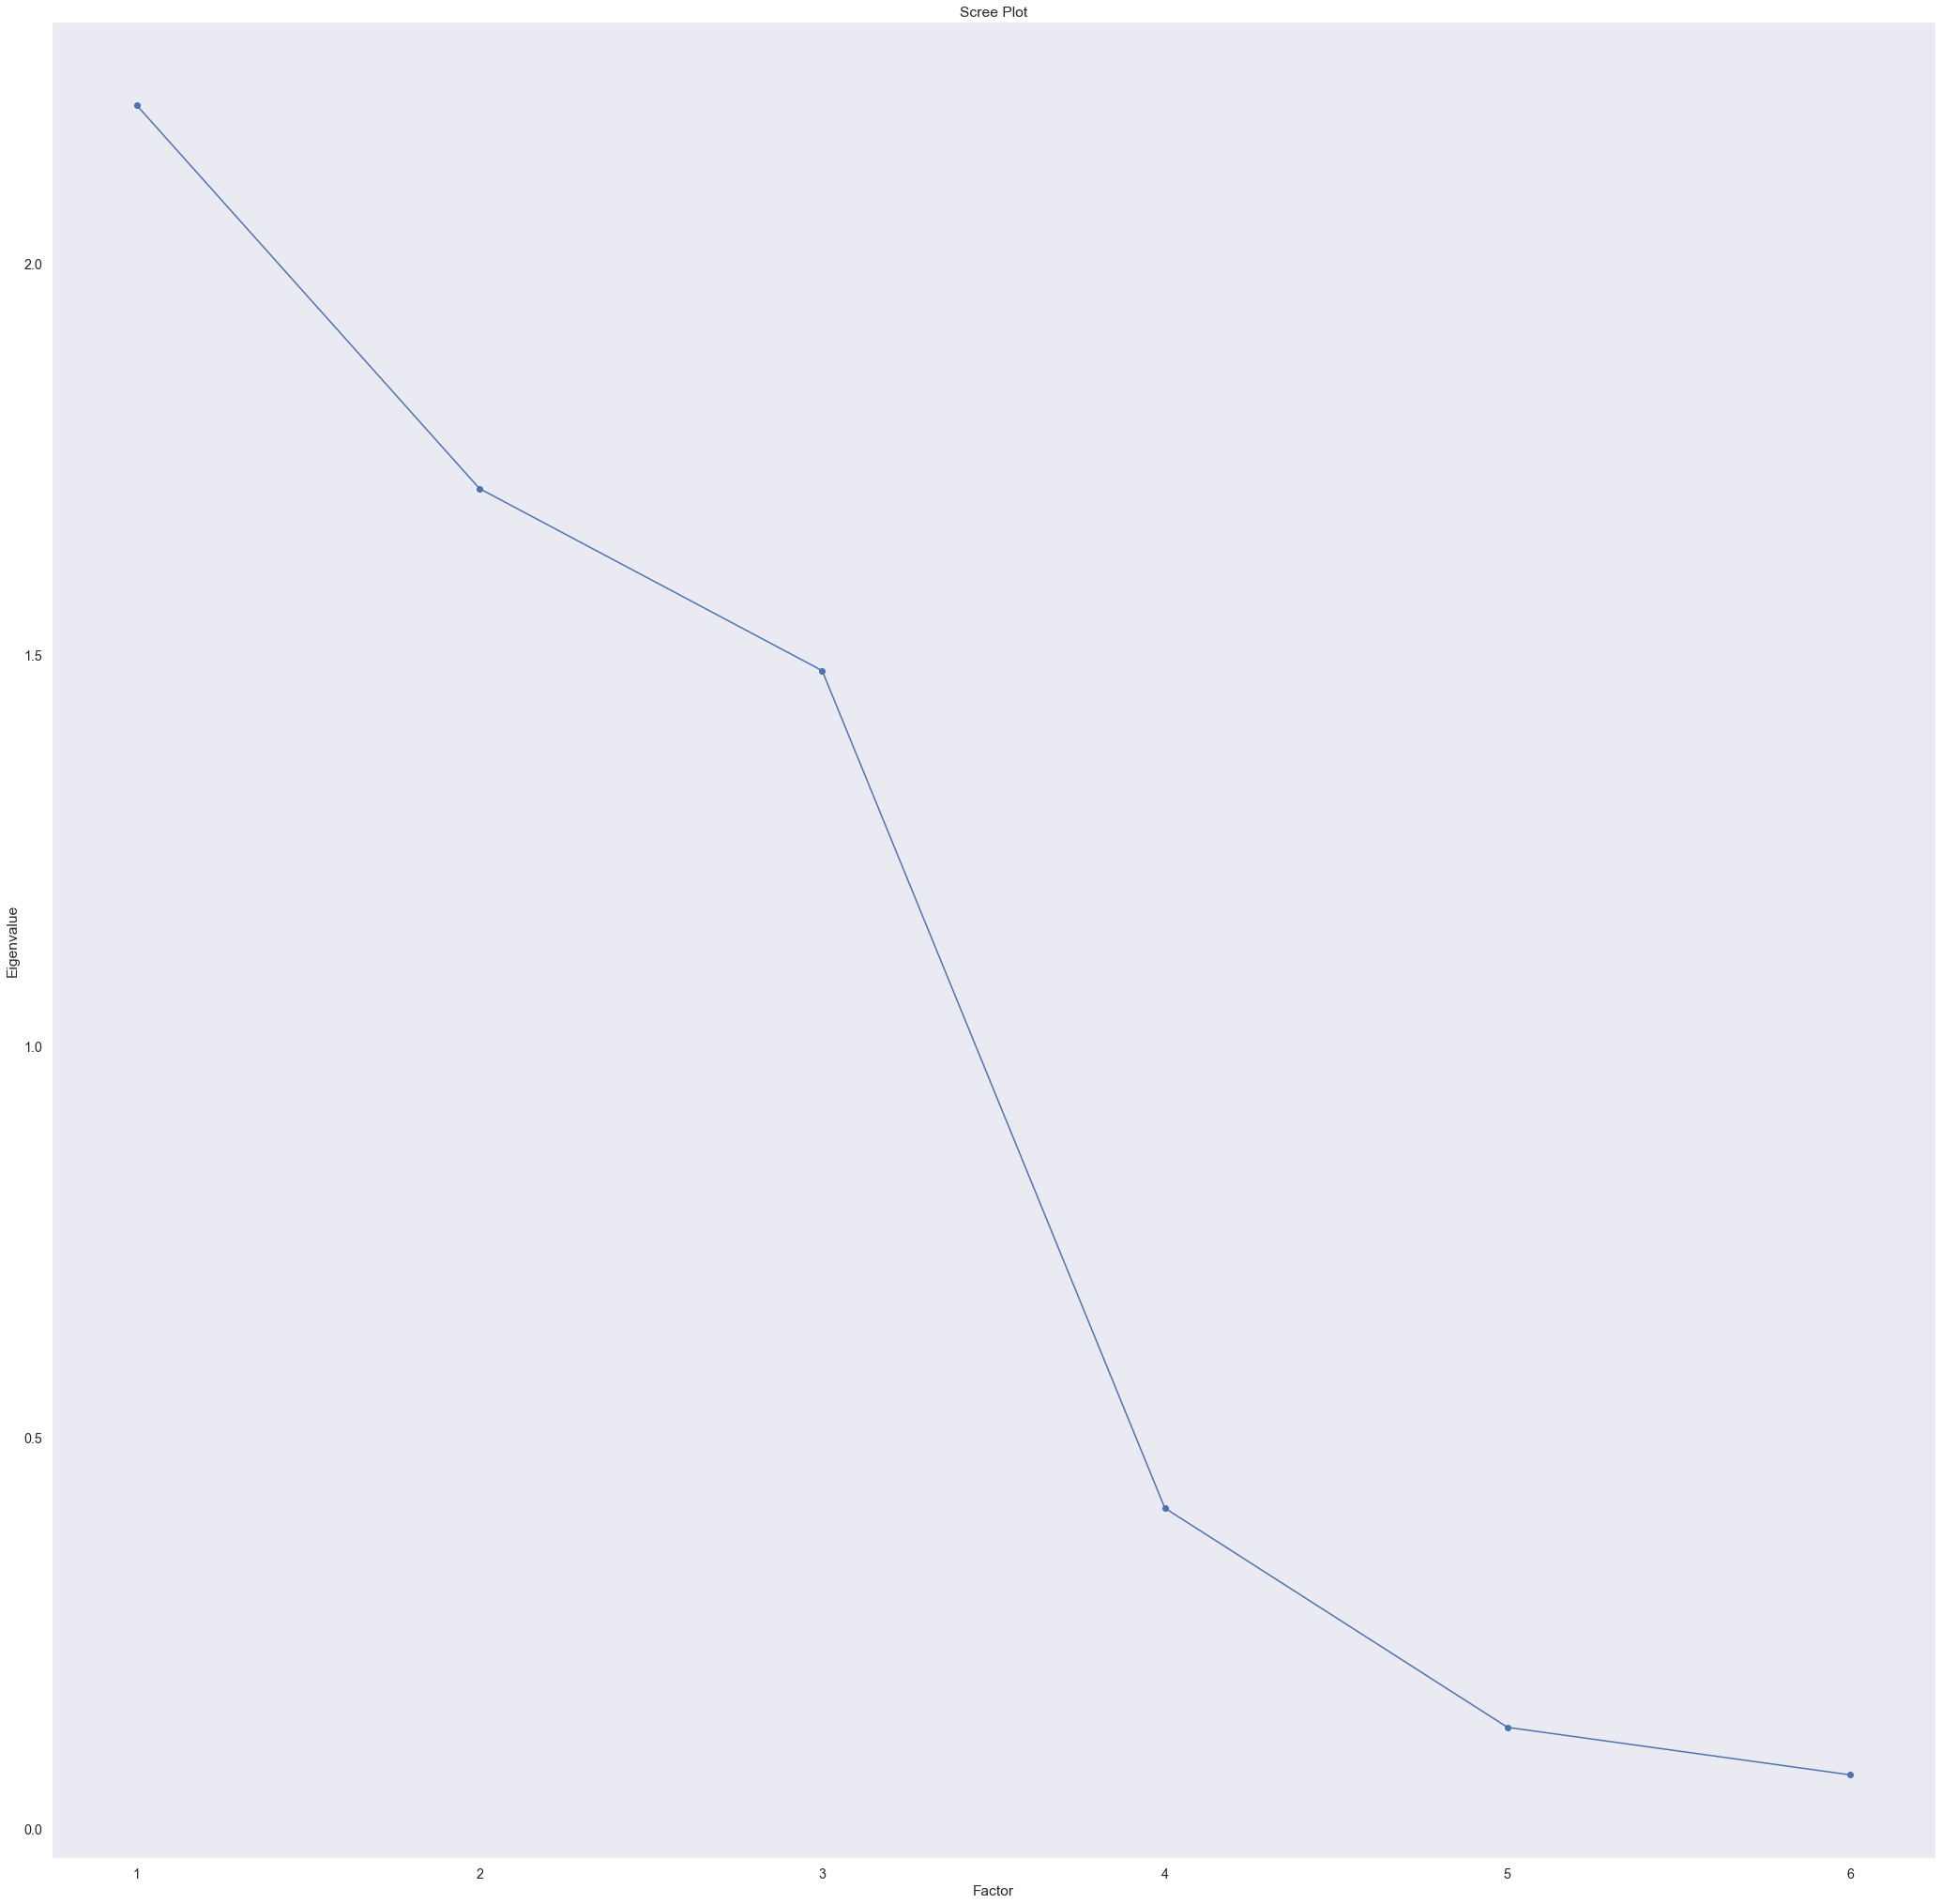

In [77]:
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

#Droppin Nas
HumanAavatarQ.dropna(inplace=True);

#Adecuacy test

#Barlets sphericity: A significative p value indicates the date is different from an identity matrix
chi_square_value,p_value= calculate_bartlett_sphericity(HumanAavatarQ)
print(chi_square_value,p_value)

# Kaiser-Meyer-Olkin (KMO): Estimates the proportion of variance among all observed variables, less than 0.6 is inadequate
kmo_all,kmo_model=calculate_kmo(HumanAavatarQ)
print(kmo_model)
#Create factor analysis object and perform analysis
fa= FactorAnalyzer(rotation='varimax')
fa.fit(HumanAavatarQ)

loadings = fa.loadings_

# Get the eigenvector
ev, v = fa.get_eigenvalues()

xvals = range(1, HumanAavatarQ.shape[1]+1)
plt.scatter(xvals, ev)
plt.plot(xvals, ev)
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [78]:
# Response time predicted by Avatar Presence
formula = "np.log(RT) ~ remember_action_likert + remember_standing_likert  + attractive_action_likert + attractive_standing_likert + realistic_action_likert + realistic_standing_likert"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

                Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     np.log(RT)
No. Observations:      8713        Method:                 REML      
No. Groups:            26          Scale:                  0.4058    
Min. group size:       329         Log-Likelihood:         -8493.8036
Max. group size:       336         Converged:              Yes       
Mean group size:       335.1                                         
---------------------------------------------------------------------
                           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------
Intercept                   1.545    0.520  2.972 0.003  0.526  2.564
remember_action_likert      0.039    0.130  0.305 0.761 -0.215  0.294
remember_standing_likert   -0.199    0.186 -1.067 0.286 -0.564  0.166
attractive_action_likert    0.365    0.246  1.483 0.138 -0.118  0.848
attractive_standing_likert -0.323   

In [79]:
import random
number = random.randint(1000,9999)
print(number)

1508


In [80]:
# Response time predicted by Avatar Presence
formula = "np.log(AbsolutError) ~ ContextQ_average "

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

              Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: np.log(AbsolutError)
No. Observations: 8713    Method:             REML                
No. Groups:       26      Scale:              1.7271              
Min. group size:  329     Log-Likelihood:     -14792.7910         
Max. group size:  336     Converged:          Yes                 
Mean group size:  335.1                                           
-------------------------------------------------------------------
                    Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
-------------------------------------------------------------------
Intercept            3.553     0.346  10.265  0.000   2.875   4.232
ContextQ_average    -0.068     0.086  -0.788  0.431  -0.236   0.101
Group Var            0.187     0.042                               



In [81]:
# Response time predicted by Avatar Presence
formula = "remember_action_likert ~ AffiliativeQ_average "

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

               Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: remember_action_likert
No. Observations: 8713    Method:             REML                  
No. Groups:       26      Scale:              0.0000                
Min. group size:  329     Log-Likelihood:     118949.7675           
Max. group size:  336     Converged:          Yes                   
Mean group size:  335.1                                             
---------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
---------------------------------------------------------------------
Intercept              1.960     0.021  95.589  0.000   1.920   2.000
AffiliativeQ_average   0.253     0.005  49.529  0.000   0.243   0.263
Group Var              0.001    60.957                               



/Users/tracysanchezpacheco/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


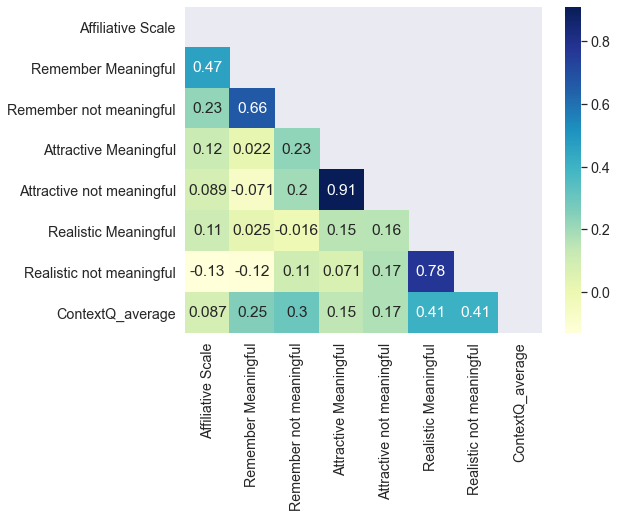

In [82]:
HumanAaffili = HumanAf[['AffiliativeQ_average', 'remember_action_likert', 'remember_standing_likert', 'attractive_action_likert', 'attractive_standing_likert', 'realistic_action_likert', 'realistic_standing_likert','ContextQ_average' ]]
corrMatrix = HumanAaffili.corr()

fig, ax = plt.subplots(figsize=(8,6))
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
sns.heatmap(corrMatrix, annot=True, cmap="YlGnBu", ax=ax, mask=mask)

ax.set_xticklabels(['Affiliative Scale', 'Remember Meaningful', 'Remember not meaningful', 'Attractive Meaningful', 'Attractive not meaningful', 'Realistic Meaningful', 'Realistic not meaningful', 'ContextQ_average']);
ax.set_yticklabels(['Affiliative Scale', 'Remember Meaningful', 'Remember not meaningful', 'Attractive Meaningful', 'Attractive not meaningful', 'Realistic Meaningful', 'Realistic not meaningful', 'ContextQ_average']);

/Users/tracysanchezpacheco/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='remember_action_likert', ylabel='AffiliativeQ_average'>

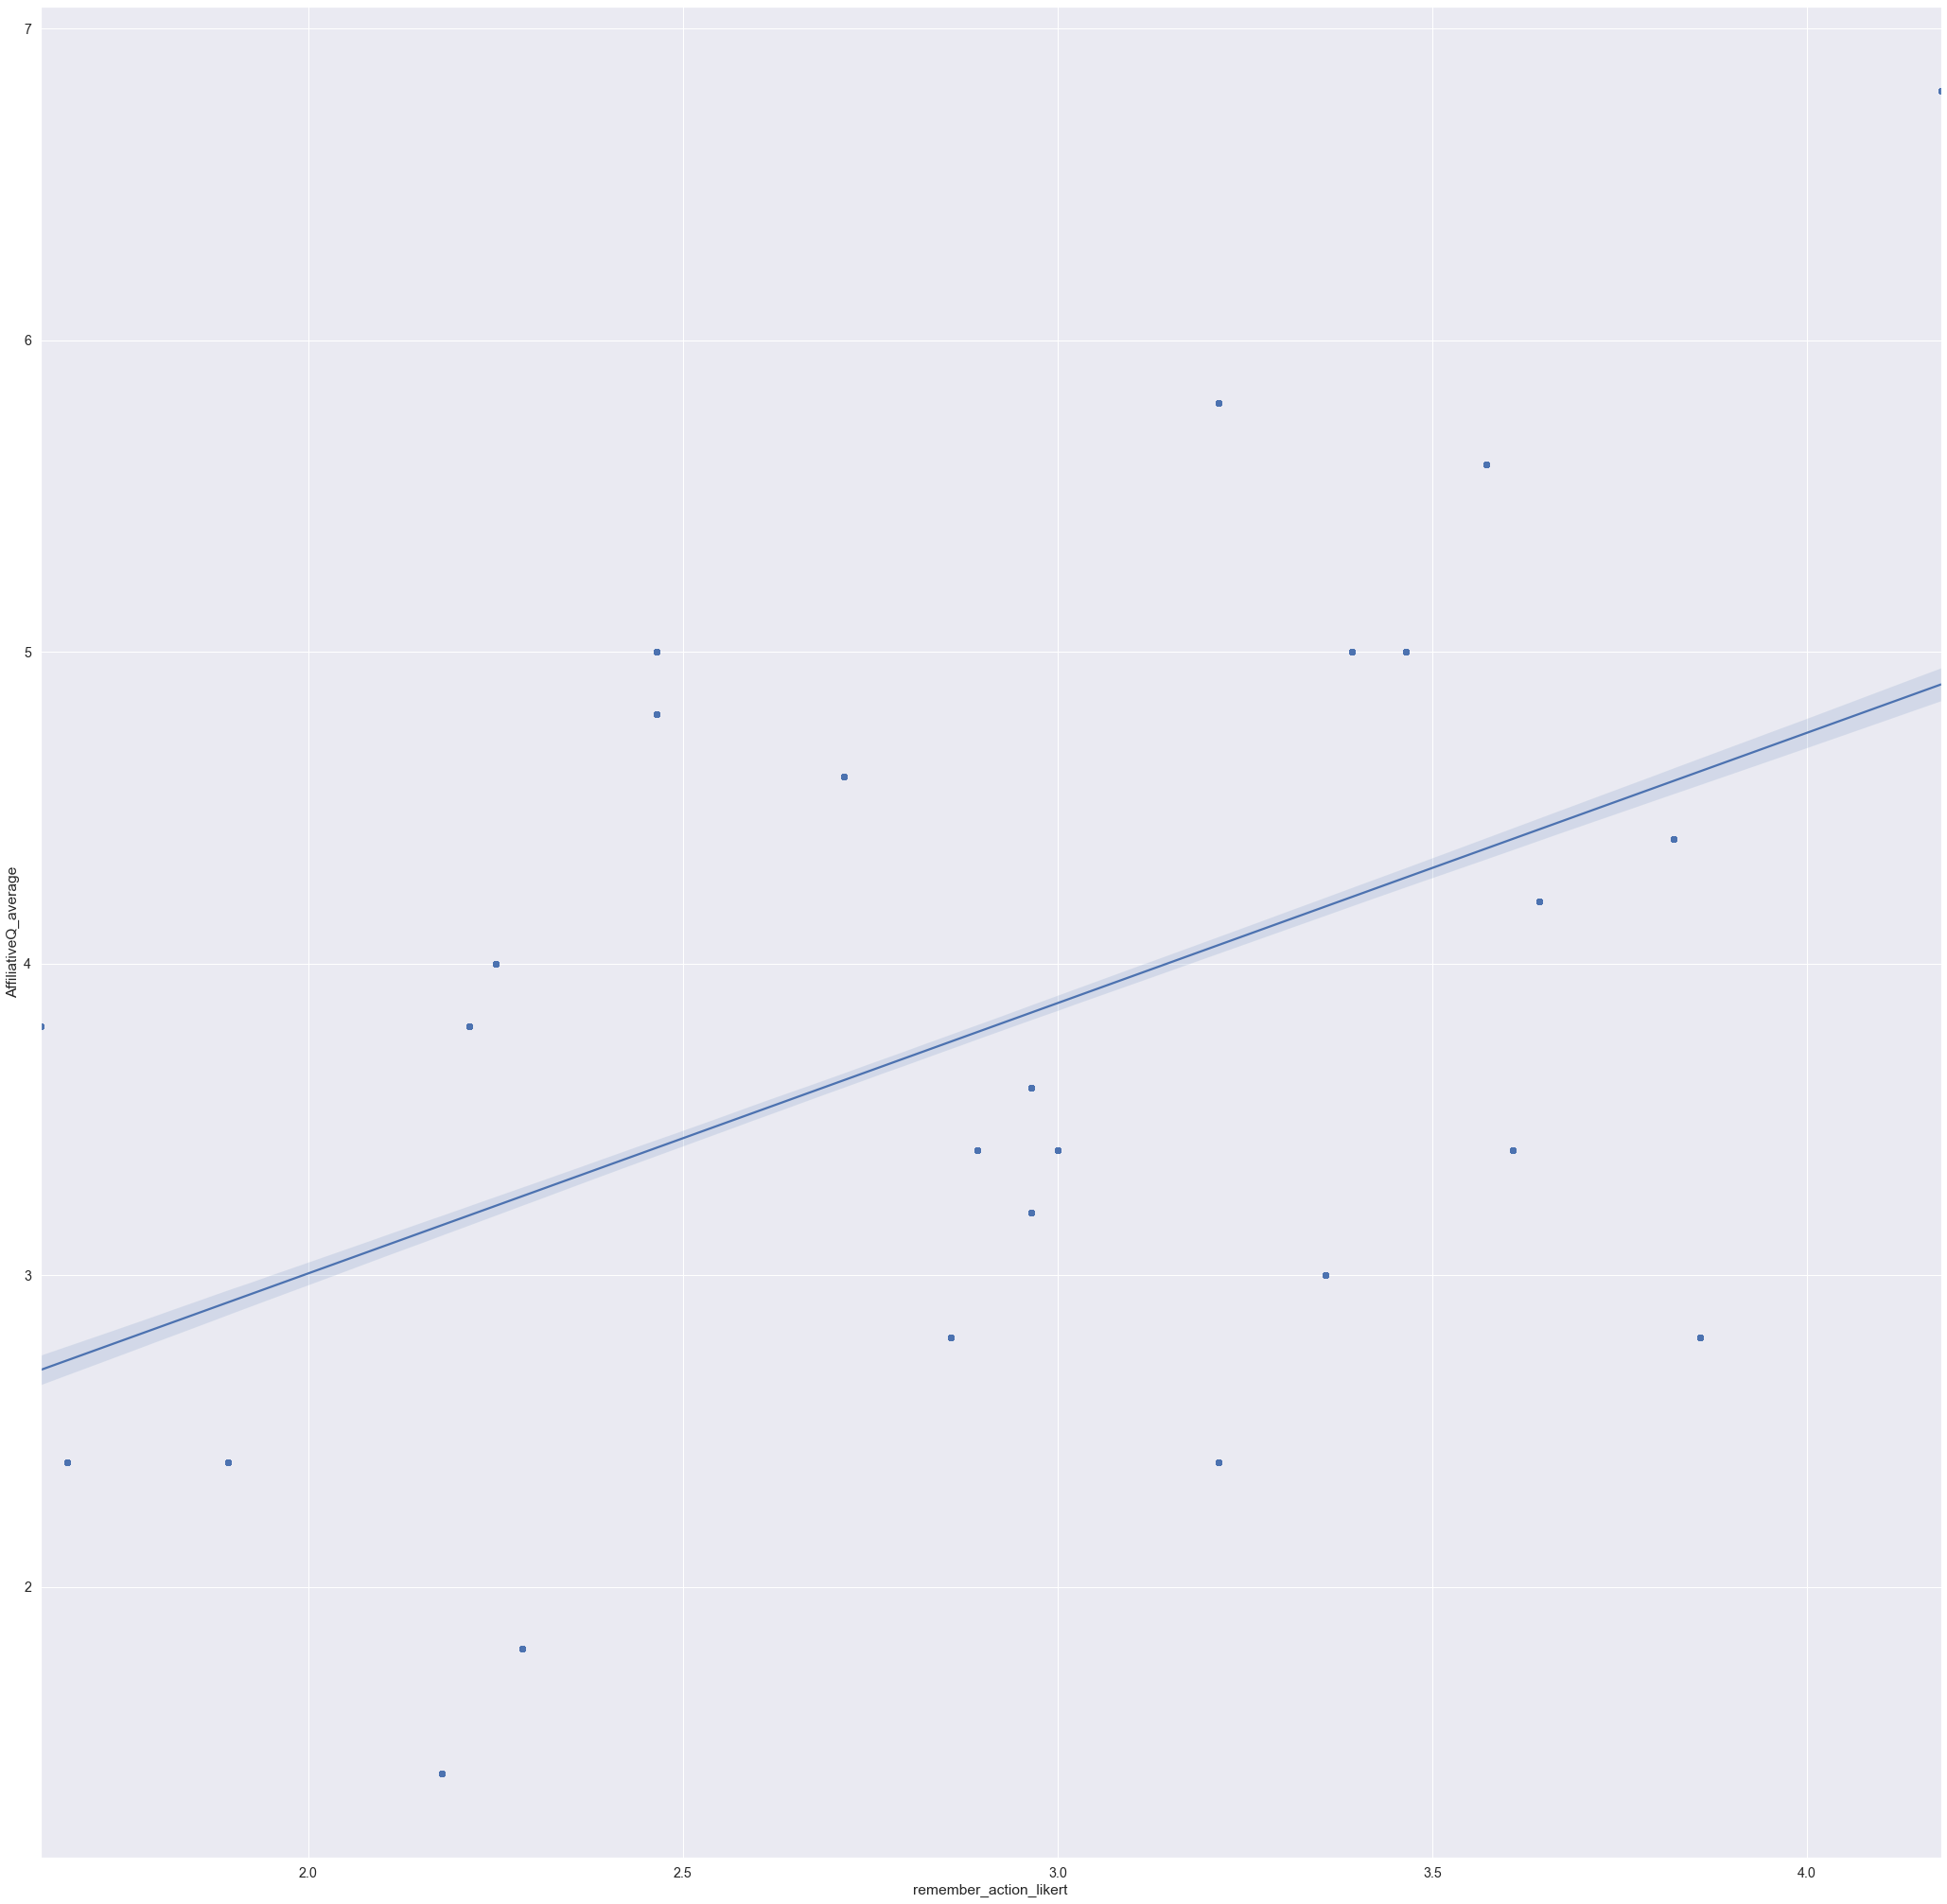

In [83]:
sns.regplot('remember_action_likert', 'AffiliativeQ_average', data= HumanAaffili )

/Users/tracysanchezpacheco/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='realistic_standing_likert', ylabel='AffiliativeQ_average'>

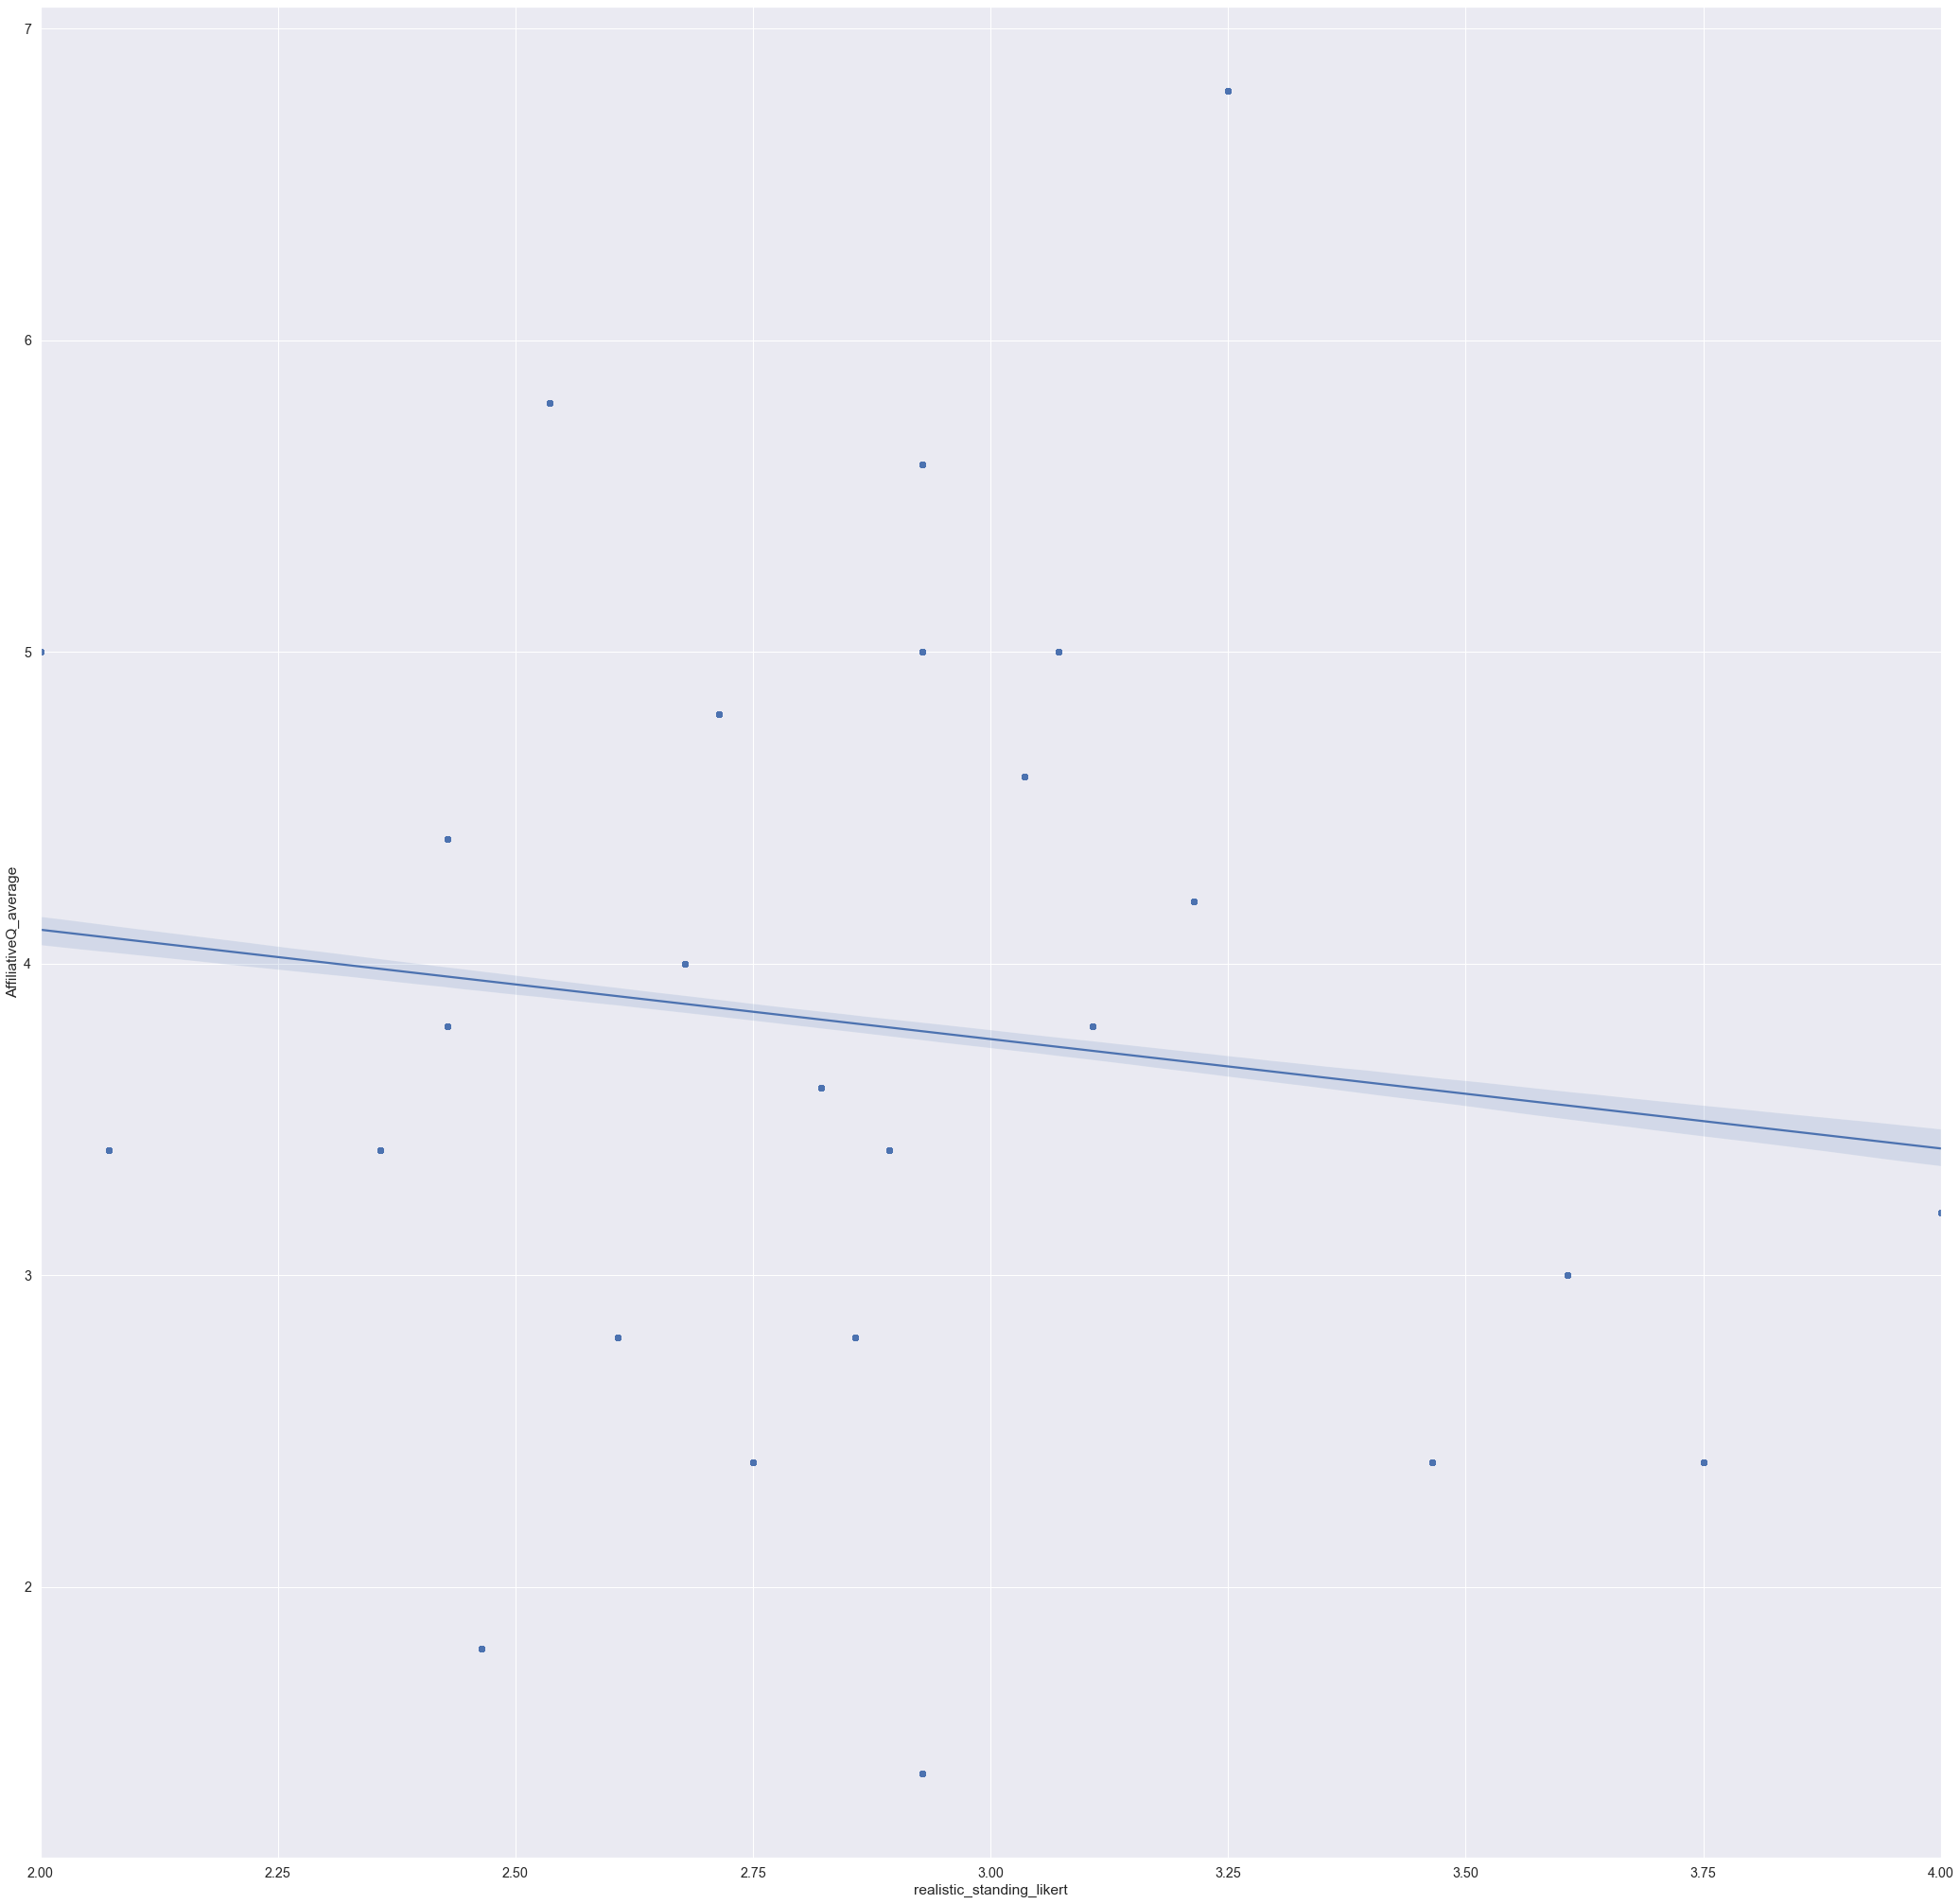

In [84]:
sns.regplot('realistic_standing_likert', 'AffiliativeQ_average', data= HumanAaffili )

In [85]:
import scipy.stats
r, p = scipy.stats.pearsonr(HumanAf.AffiliativeQ_average, HumanAf.realistic_standing_likert)
p

1.884651032741326e-34

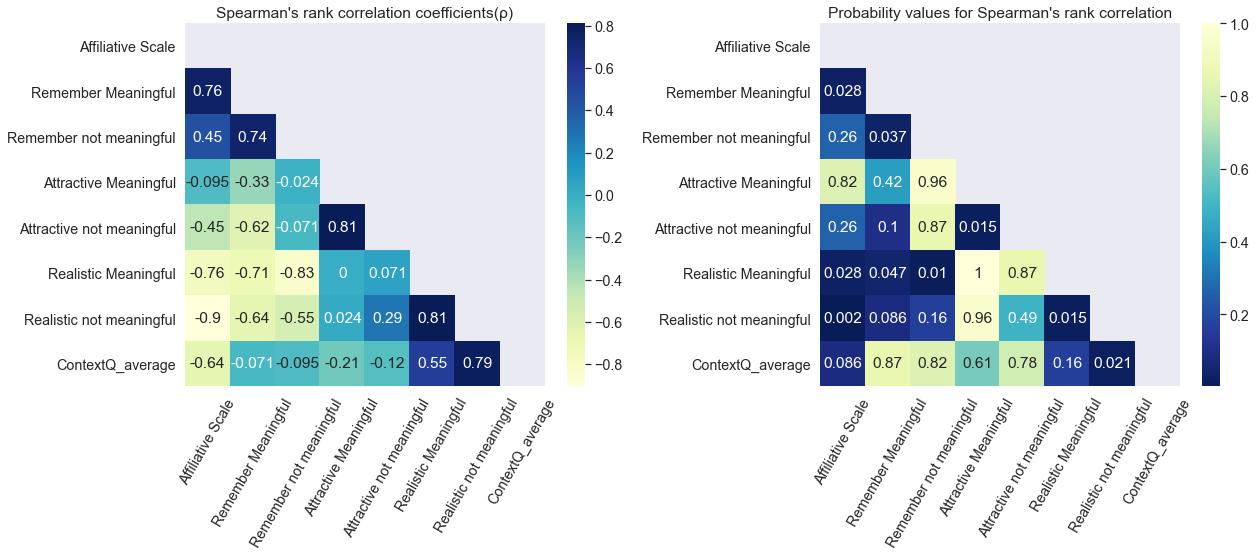

In [86]:
sns.set(rc={"figure.figsize":(18, 8)})
sns.set(font_scale = 1.3)
from matplotlib import cm

fig, ax = plt.subplots(1,2)

cor, pval = stats.spearmanr(corrMatrix.T)
sns.heatmap(cor, annot=True, cmap="YlGnBu", mask=mask, ax=ax[0]).set(title="Spearman's rank correlation coefficients(ρ)")
initial_cmap = cm.get_cmap('YlGnBu')
reversed_cmap=initial_cmap.reversed()
sns.heatmap(pval, annot=True, cmap=reversed_cmap, mask=mask, ax=ax[1]).set(title="Probability values for Spearman's rank correlation")

for ax in ax.ravel():
    ax.set_xticklabels(['Affiliative Scale', 'Remember Meaningful', 'Remember not meaningful', 'Attractive Meaningful', 'Attractive not meaningful', 'Realistic Meaningful', 'Realistic not meaningful', 'ContextQ_average'], rotation=60);
    ax.set_yticklabels(['Affiliative Scale', 'Remember Meaningful', 'Remember not meaningful', 'Attractive Meaningful', 'Attractive not meaningful', 'Realistic Meaningful', 'Realistic not meaningful', 'ContextQ_average'], rotation=360);
plt.tight_layout()
plt.show()

In [87]:
HumanAf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8713 entries, 1 to 9051
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       8713 non-null   int64  
 1   ID                               8713 non-null   float64
 2   Alter                            8713 non-null   float64
 3   Global                           8713 non-null   float64
 4   Overview                         8713 non-null   float64
 5   Cardinal                         8713 non-null   float64
 6   AffiliativeQ_average             8713 non-null   float64
 7   ContextQ_average                 8713 non-null   float64
 8   remember_action_likert           8713 non-null   float64
 9   remember_standing_likert         8713 non-null   float64
 10  attractive_action_likert         8713 non-null   float64
 11  attractive_standing_likert       8713 non-null   float64
 12  realistic_action_lik

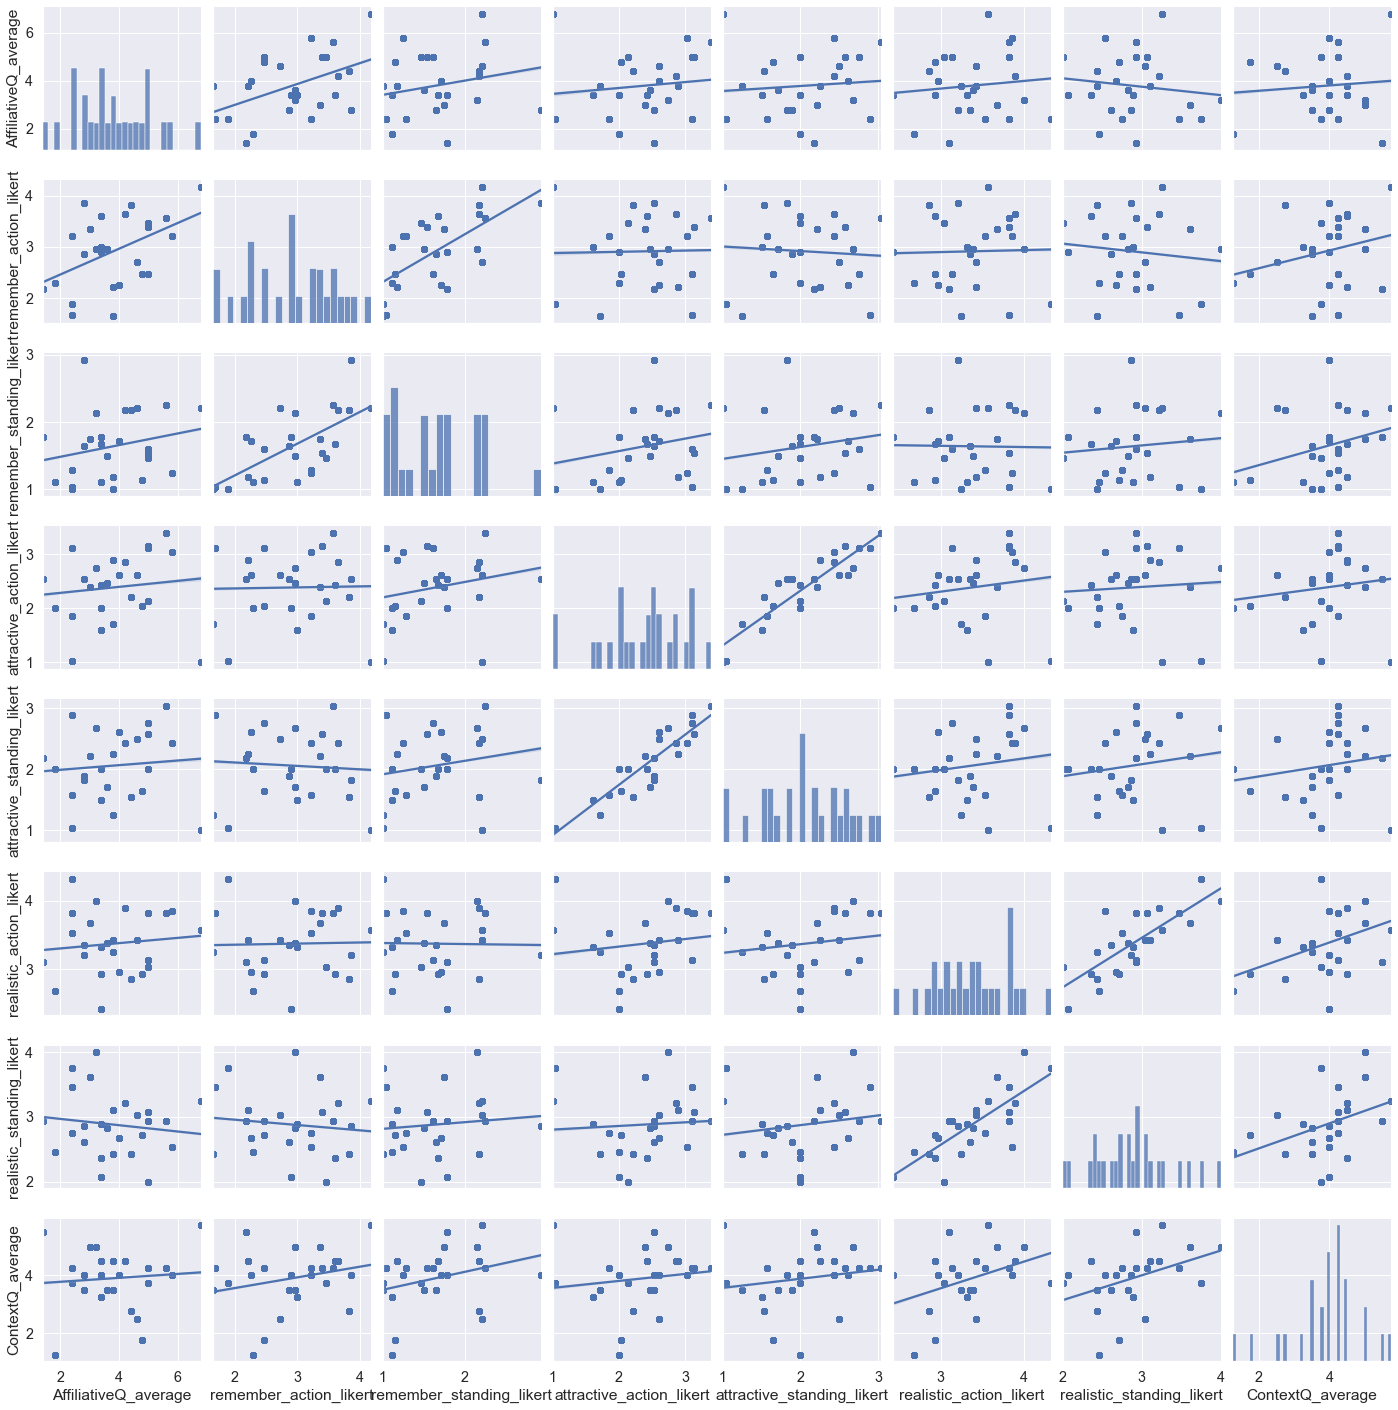

In [88]:
# library & dataset
import matplotlib.pyplot as plt
import seaborn as sns

# with regression
sns.pairplot(HumanAaffili, kind="reg")
plt.show()